In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [4]:
import polars as pl

In [5]:
amex = pl.read_csv('train_data.csv')


In [6]:
amex.head()

customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,...,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,...,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64
"""0000099d6bd597...","""2017-03-09""",0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,null,null,0.0006,0.080986,0.708906,0.1706,0.006204,0.358587,0.525351,0.255736,null,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,null,0.023381,0.002768,0.008322,1.001519,0.008298,...,0.676922,0.007871,1.0,0.2382,0.0,4.0,0.2321,0.236266,0.0,0.7022,0.434345,0.003057,0.686516,0.0087,1.0,1.003319,1.007819,1.0,0.006805,null,0.002052,0.005972,null,0.004345,0.001535,null,null,null,null,null,0.002427,0.003706,0.003818,null,0.000569,0.0006,0.002674
"""0000099d6bd597...","""2017-04-07""",0.936665,0.005775,0.004923,1.000653,0.006151,0.1267,0.000798,0.002714,null,null,0.002526,0.069419,0.712795,0.113239,0.006206,0.3536,0.521311,0.223329,null,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,null,0.030599,0.002749,0.002482,1.009033,0.005136,...,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,null,0.001034,0.004838,null,0.007495,0.004931,null,null,null,null,null,0.003954,0.003167,0.005032,null,0.009576,0.005492,0.009217
"""0000099d6bd597...","""2017-05-28""",0.9541,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,null,null,0.007605,0.068839,0.720884,0.060492,0.003259,0.3346,0.524568,0.189424,null,0.066982,0.056647,0.005126,0.151955,1.337179,0.009355,0.007426,0.206629,0.738044,0.134073,null,0.048367,0.010077,0.0005,1.009184,0.006961,...,0.853498,0.003269,1.0,0.239867,0.0,4.0,0.240768,0.2397,0.0,0.704843,0.434409,0.003954,0.690101,0.009617,1.0,1.009307,1.007831,1.006878,0.003221,null,0.005681,0.005497,null,0.009227,0.009123,null,null,null,null,null,0.003269,0.007329,0.000427,null,0.003429,0.006986,0.002603
"""0000099d6bd597...","""2017-06-13""",0.960384,0.002455,0.013683,1.0027,0.001373,0.117169,0.000685,0.005531,null,null,0.006406,0.0556,0.723997,0.166782,0.009918,0.323271,0.530929,0.135586,null,0.0837,0.049253,0.001418,0.151219,1.339909,0.006782,0.003515,0.208214,0.741813,0.134437,null,0.030063,0.009667,0.000783,1.007456,0.008706,...,0.844667,0.000053,1.0,0.2409,0.0,4.0,0.2394,0.240727,0.0,0.711546,0.436903,0.005135,0.687779,0.004649,1.0,1.001671,1.0034,1.007573,0.007703,null,0.007108,0.008261,null,0.007206,0.002409,null,null,null,null,null,0.006117,0.004516,0.0032,null,0.008419,0.006527,0.0096
"""0000099d6bd597...","""2017-07-16""",0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,null,null,0.007731,0.038862,0.720619,0.1436,0.006667,0.231009,0.529305,null,null,0.0759,0.048918,0.001199,0.154026,1.341735,0.000519,0.001362,0.205468,0.691986,0.121518,null,0.054221,0.009484,0.006698,1.003738,0.003846,...,0.811199,0.008724,1.0,0.247939,0.0,4.0,0.244199,0.242325,0.0,0.705343,0.437433,0.002849,0.688774,0.000097,1.0,1.009886,1.005053,1.008132,0.009823,null,0.0096,0.004848,null,0.006312,0.004462,null,null,null,null,null,0.003671,0.004946,0.008889,null,0.0016,0.008126,0.009827


In [7]:
amex.shape

(5531451, 190)

In [8]:
amex.null_count()

customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,...,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,...,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,45985,0,0,2016,0,1020544,2016,2016,4740137,1658396,274319,0,2017,0,0,1211699,0,718725,4985917,233,0,22268,3142402,0,0,0,29563,301492,0,4084585,0,0,0,2016,0,...,1400935,176716,176716,176716,176716,176716,176716,176716,176716,176716,176716,176716,176716,176716,116816,0,101548,101548,690,5459973,101548,101548,4988874,42716,0,5336752,5336752,5336752,5336752,5336752,101548,40632,101548,4587043,101548,40727,101548


In [9]:
amex.shrink_to_fit()

customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,...,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,...,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64
"""0000099d6bd597...","""2017-03-09""",0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,null,null,0.0006,0.080986,0.708906,0.1706,0.006204,0.358587,0.525351,0.255736,null,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,null,0.023381,0.002768,0.008322,1.001519,0.008298,...,0.676922,0.007871,1.0,0.2382,0.0,4.0,0.2321,0.236266,0.0,0.7022,0.434345,0.003057,0.686516,0.0087,1.0,1.003319,1.007819,1.0,0.006805,null,0.002052,0.005972,null,0.004345,0.001535,null,null,null,null,null,0.002427,0.003706,0.003818,null,0.000569,0.0006,0.002674
"""0000099d6bd597...","""2017-04-07""",0.936665,0.005775,0.004923,1.000653,0.006151,0.1267,0.000798,0.002714,null,null,0.002526,0.069419,0.712795,0.113239,0.006206,0.3536,0.521311,0.223329,null,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,null,0.030599,0.002749,0.002482,1.009033,0.005136,...,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,null,0.001034,0.004838,null,0.007495,0.004931,null,null,null,null,null,0.003954,0.003167,0.005032,null,0.009576,0.005492,0.009217
"""0000099d6bd597...","""2017-05-28""",0.9541,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,null,null,0.007605,0.068839,0.720884,0.060492,0.003259,0.3346,0.524568,0.189424,null,0.066982,0.056647,0.005126,0.151955,1.337179,0.009355,0.007426,0.206629,0.738044,0.134073,null,0.048367,0.010077,0.0005,1.009184,0.006961,...,0.853498,0.003269,1.0,0.239867,0.0,4.0,0.240768,0.2397,0.0,0.704843,0.434409,0.003954,0.690101,0.009617,1.0,1.009307,1.007831,1.006878,0.003221,null,0.005681,0.005497,null,0.009227,0.009123,null,null,null,null,null,0.003269,0.007329,0.000427,null,0.003429,0.006986,0.002603
"""0000099d6bd597...","""2017-06-13""",0.960384,0.002455,0.013683,1.0027,0.001373,0.117169,0.000685,0.005531,null,null,0.006406,0.0556,0.723997,0.166782,0.009918,0.323271,0.530929,0.135586,null,0.0837,0.049253,0.001418,0.151219,1.339909,0.006782,0.003515,0.208214,0.741813,0.134437,null,0.030063,0.009667,0.000783,1.007456,0.008706,...,0.844667,0.000053,1.0,0.2409,0.0,4.0,0.2394,0.240727,0.0,0.711546,0.436903,0.005135,0.687779,0.004649,1.0,1.001671,1.0034,1.007573,0.007703,null,0.007108,0.008261,null,0.007206,0.002409,null,null,null,null,null,0.006117,0.004516,0.0032,null,0.008419,0.006527,0.0096
"""0000099d6bd597...","""2017-07-16""",0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,null,null,0.007731,0.038862,0.720619,0.1436,0.006667,0.231009,0.529305,null,null,0.0759,0.048918,0.001199,0.154026,1.341735,0.000519,0.001362,0.205468,0.691986,0.121518,null,0.054221,0.009484,0.006698,1.003738,0.003846,...,0.811199,0.008724,1.0,0.247939,0.0,4.0,0.244199,0.242325,0.0,0.705343,0.437433,0.002849,0.688774,0.000097,1.0,1.009886,1.005053,1.008132,0.009823,null,0.0096,0.004848,null,0.006312,0.004462,null,null,null,null,null,0.003671,0.004946,0.008889,null,0.0016,0.008126,0.009827
"""0000099d6bd597...","""2017-08-04""",0.945964,0.001746,0.007863,1.005006,0.0042,0.110946,0.009857,0.009866,null,null,0.004128,0.027265,0.721371,0.138303,0.006437,0.275963,0.529762,null,null,0.095784,0.035738,0.004577,0.149506,1.0005,0.007123,0.007585,0.204167,0.676528,0.1

In [10]:
df = amex.to_pandas()

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.isna().any()

customer_ID    False
S_2            False
P_2             True
D_39           False
B_1            False
               ...  
D_141           True
D_142           True
D_143           True
D_144           True
D_145           True
Length: 190, dtype: bool

In [13]:
missing_values = pd.concat([df.isna().sum(), df.isna().mean() * 100], axis=1)


In [14]:
missing_values.rename(columns={0: 'count', 1:'percent_missing'}, inplace=True)

In [15]:
missing_values.sort_values(by='count', ascending=False)

,count,percent_missing
D_87,5527586,99.930127
D_88,5525447,99.891457
D_108,5502513,99.476846
D_111,5500117,99.433530
D_110,5500117,99.433530
...,...,...
B_24,0,0.000000
D_75,0,0.000000
P_4,0,0.000000
B_23,0,0.000000


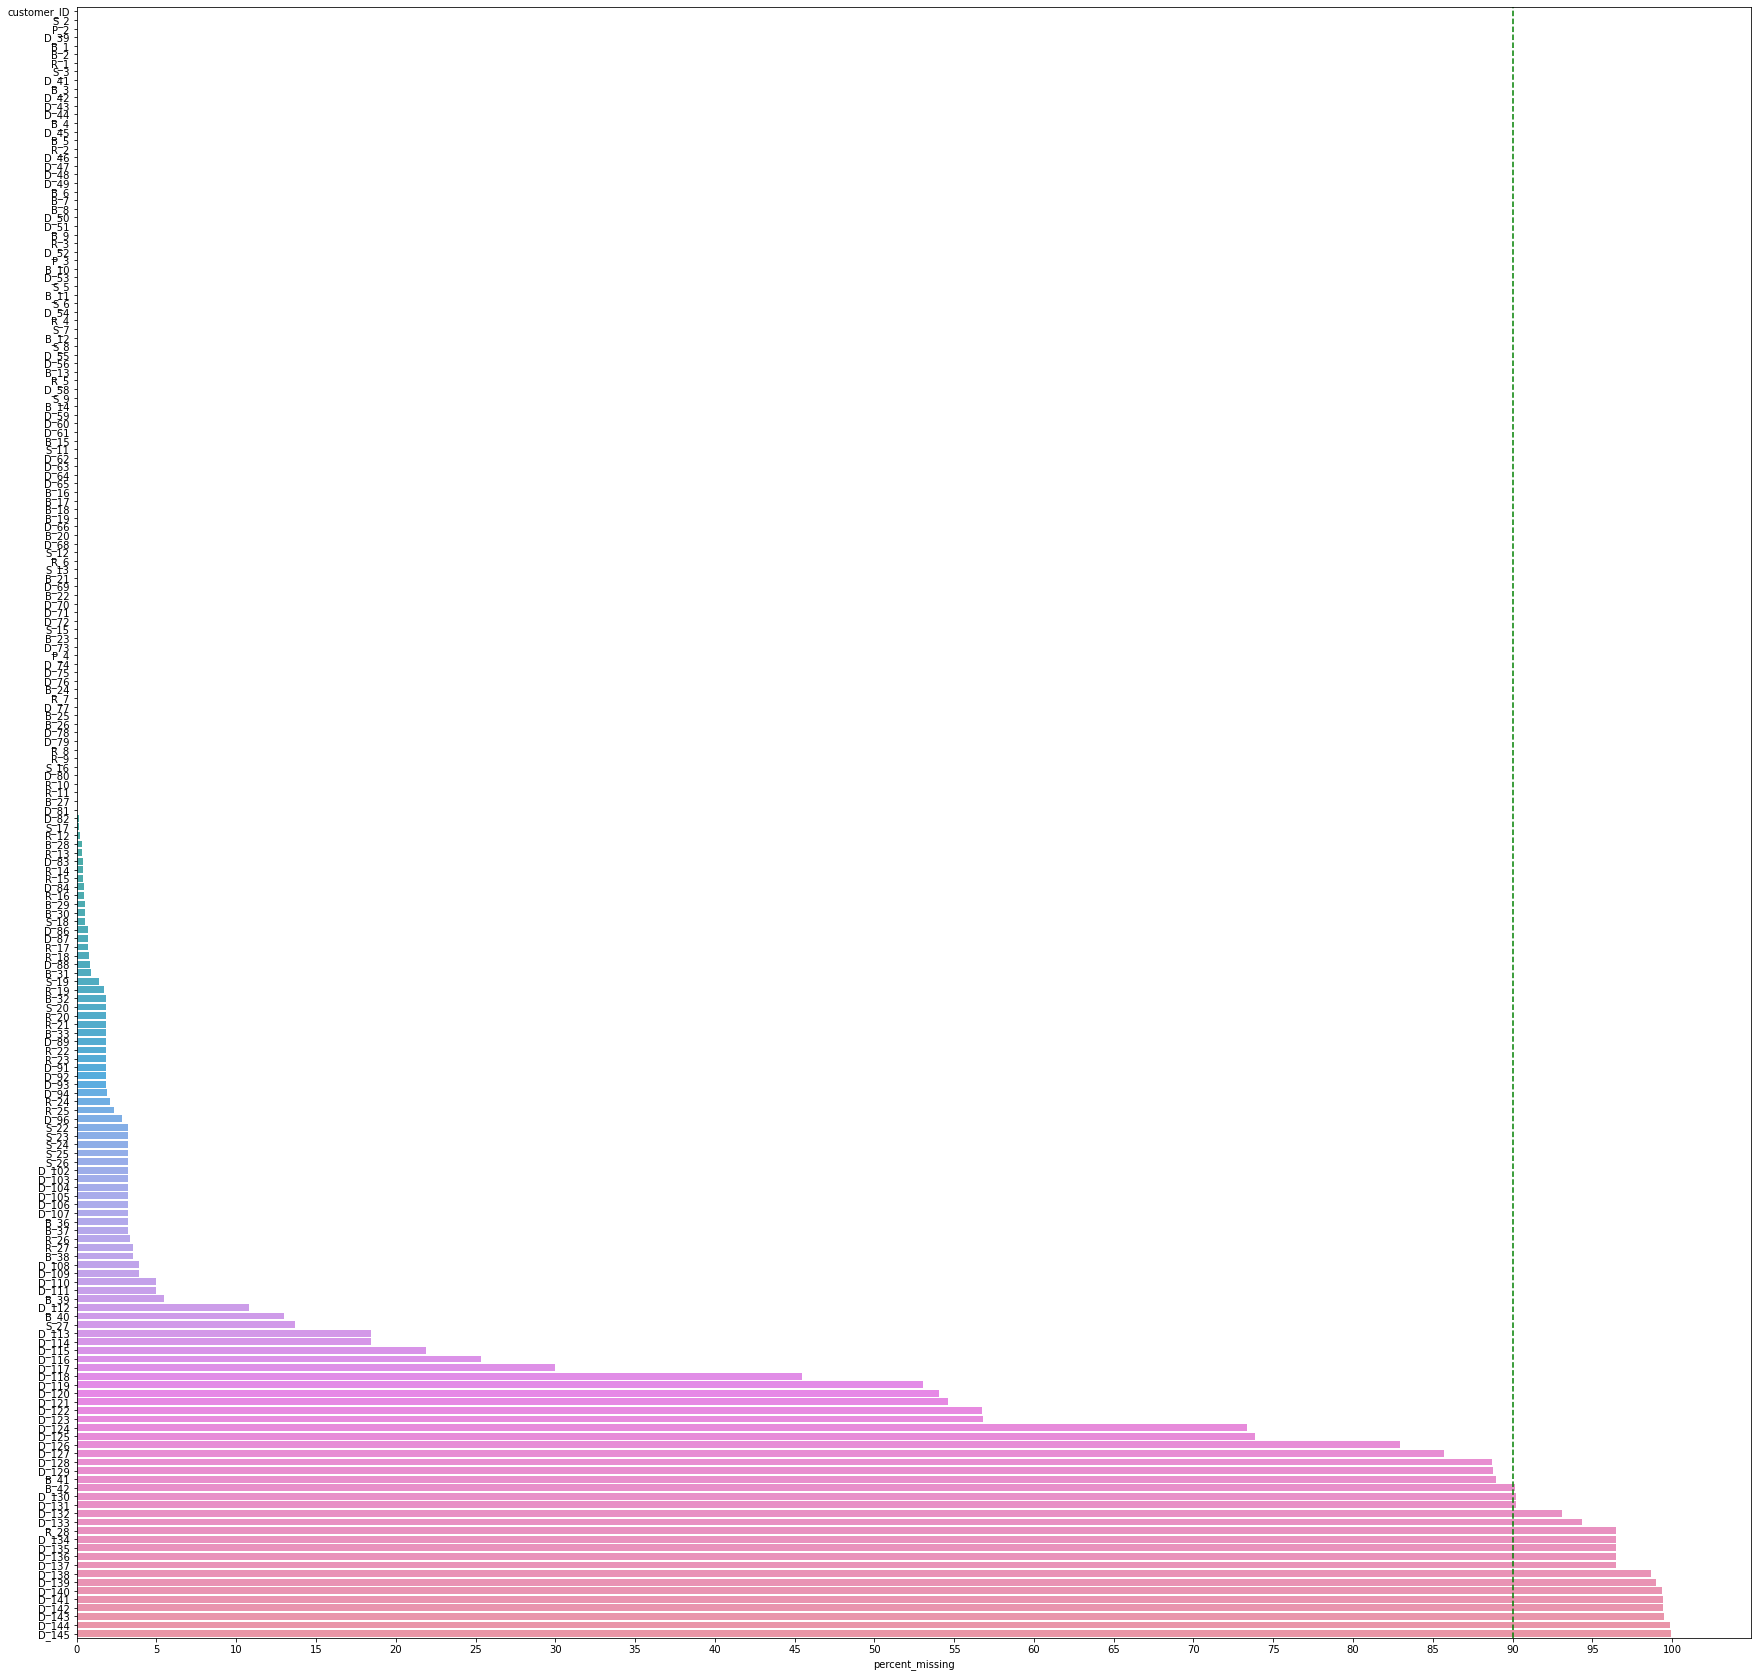

In [16]:
plt.figure(figsize=(30,30))
sns.barplot(x='percent_missing', y=missing_values.index, data=missing_values.sort_values(by='count', ascending=True))
plt.xticks(np.arange(0, 105, 5))
plt.axvline(x=90, linestyle='--', color='green')

In [17]:
df[df['D_64'].isna()]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
78,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,None,None,None,0.008263,0.006609,0.007370,None,0.007171,0.005120,0.007513
79,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,None,None,None,0.001986,0.004050,0.000796,None,0.001802,0.002364,0.003987
130,0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba17...,2018-01-10,0.612548,0.005258,0.019280,0.819749,0.509633,0.172281,0.004121,0.007350,...,None,None,None,1.007864,0.004373,0.873964,0.0454359478513612,1.009878,0.008592,0.098263
131,0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba17...,2018-02-22,0.254523,0.241415,0.097851,1.007578,1.004001,0.162269,0.007868,0.009932,...,None,None,None,1.005836,0.004149,0.875659,0.0562567102123776,1.005389,0.009446,0.093157
250,000391f219520dbca6c3c1c46e0fab569da163f79ee266...,2017-12-29,0.619622,0.003621,0.021438,0.814854,0.006897,0.319587,0.003891,0.000794,...,None,None,None,NaN,0.001000,NaN,None,NaN,0.005744,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531265,fffe2bc02423407e33a607660caeed076d713d8a5ad323...,2017-10-11,0.643031,0.005994,0.996134,0.812032,0.005152,1.099572,0.003452,0.003655,...,None,None,None,0.005345,0.004460,0.004785,None,0.009687,0.005911,0.003807
5531266,fffe2bc02423407e33a607660caeed076d713d8a5ad323...,2017-11-29,0.516806,0.238277,1.197817,0.019846,0.257700,1.118923,0.007647,0.138206,...,None,None,None,0.008007,0.007937,0.009166,None,0.004151,0.002847,0.009487
5531345,fffee056e120fb326c9413fca5a7ab6618cc49be9bb6b1...,2018-02-27,0.839199,0.008470,0.046630,0.818442,0.005582,0.171598,0.009255,0.009283,...,None,None,None,0.004080,0.002133,0.008817,None,0.005329,0.005269,0.007182
5531373,ffff39cc22a375d07369980d02d617883dd28ad81a6aa3...,2017-03-10,0.748176,0.005384,0.098335,0.404271,0.007359,0.156495,0.273573,0.026594,...,None,None,None,0.005532,0.003428,0.009819,None,0.007794,0.001311,0.008805


In [18]:
df.loc[df['D_64'].isna(), 'D_64'] = 'unknown_d63'

In [19]:
df['D_64'].value_counts()

O              2913244
U              1523448
R               840112
unknown_d63     217442
-1               37205
Name: D_64, dtype: int64

In [20]:
df['D_63'].isna().any()

False

In [21]:
categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [22]:
df[categorical_cols].isna().any()

B_30      True
B_38      True
D_114     True
D_116     True
D_117     True
D_120     True
D_126     True
D_63     False
D_64     False
D_66      True
D_68      True
dtype: bool

In [23]:
for i in categorical_cols:
    print('column ' + i + ':', df[i].unique())

column B_30: [ 0.  2.  1. nan]
column B_38: [ 2.  1.  3.  5.  6.  7.  4. nan]
column D_114: [ 1.  0. nan]
column D_116: [ 0. nan  1.]
column D_117: [ 4. -1.  6.  2.  1. nan  3.  5.]
column D_120: [ 0.  1. nan]
column D_126: [ 1. nan  0. -1.]
column D_63: ['CR' 'CO' 'CL' 'XZ' 'XM' 'XL']
column D_64: ['O' 'R' 'unknown_d63' 'U' '-1']
column D_66: [nan  1.  0.]
column D_68: [ 6.  2.  3. nan  5.  4.  0.  1.]


In [24]:
str_cats = df[['D_63', 'D_64']]

In [25]:
str_dummies = pd.get_dummies(str_cats, drop_first=True)

In [26]:
str_dummies.head()

,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_O,D_64_R,D_64_U,D_64_unknown_d63
0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0


In [27]:
df.drop(['D_63', 'D_64'], axis=1)
df = pd.concat([df, str_dummies], axis=1)

In [28]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_145,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_O,D_64_R,D_64_U,D_64_unknown_d63
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.002674,0,1,0,0,0,1,0,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.009217,0,1,0,0,0,1,0,0,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.002603,0,1,0,0,0,1,0,0,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.009600,0,1,0,0,0,1,0,0,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.009827,0,1,0,0,0,1,0,0,0


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [32]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_145', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ',
       'D_64_O', 'D_64_R', 'D_64_U', 'D_64_unknown_d63'],
      dtype='object', length=199)

In [33]:
df[categorical_cols].isna().any()

: 

: 